In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster.elbow import kelbow_visualizer
from yellowbrick.datasets.loaders import load_nfl
import os
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
os.chdir("./")
os.getcwd()

'/Users/xiaohanduan/Documents/Code/R/06_JunyeChen/code_submit/Fig_3M'

patient_1_tsne.csv
[[ 10.0817223  -41.22177853]
 [ 11.58760821  43.0181564 ]
 [ 32.98703997  -0.40942907]
 [-35.44282189 -20.01395639]
 [-25.68813422  19.1861637 ]]
[[ 24.67664495  29.53481649   1.        ]
 [-51.41119301   2.38320268   3.        ]
 [  0.91472393  42.17276939   1.        ]
 ...
 [ 11.47760472  34.01915384   1.        ]
 [ -9.24624987 -41.90255587   0.        ]
 [ 22.57861505  25.21622979   1.        ]]
patient_4_tsne.csv
[[-39.85195524   3.39252169]
 [ 42.73317191   2.60989083]
 [ -3.50256912  32.42810772]
 [ -3.07043866 -33.86151935]]
[[ -0.635047   -37.71500142   3.        ]
 [-23.5569966   48.58220617   2.        ]
 [-34.75038498 -42.70591215   3.        ]
 ...
 [-57.33695069 -19.99259291   0.        ]
 [ -5.78444176  13.37319529   2.        ]
 [  4.79073727  40.62074169   2.        ]]
patient_3_tsne.csv
[[ -3.9862689   37.74033634]
 [ 19.44982544  11.68770994]
 [-34.55062015   1.28845186]
 [ 33.83148718 -25.03834804]
 [ -8.95614515 -29.79278822]]
[[-47.35203353   8

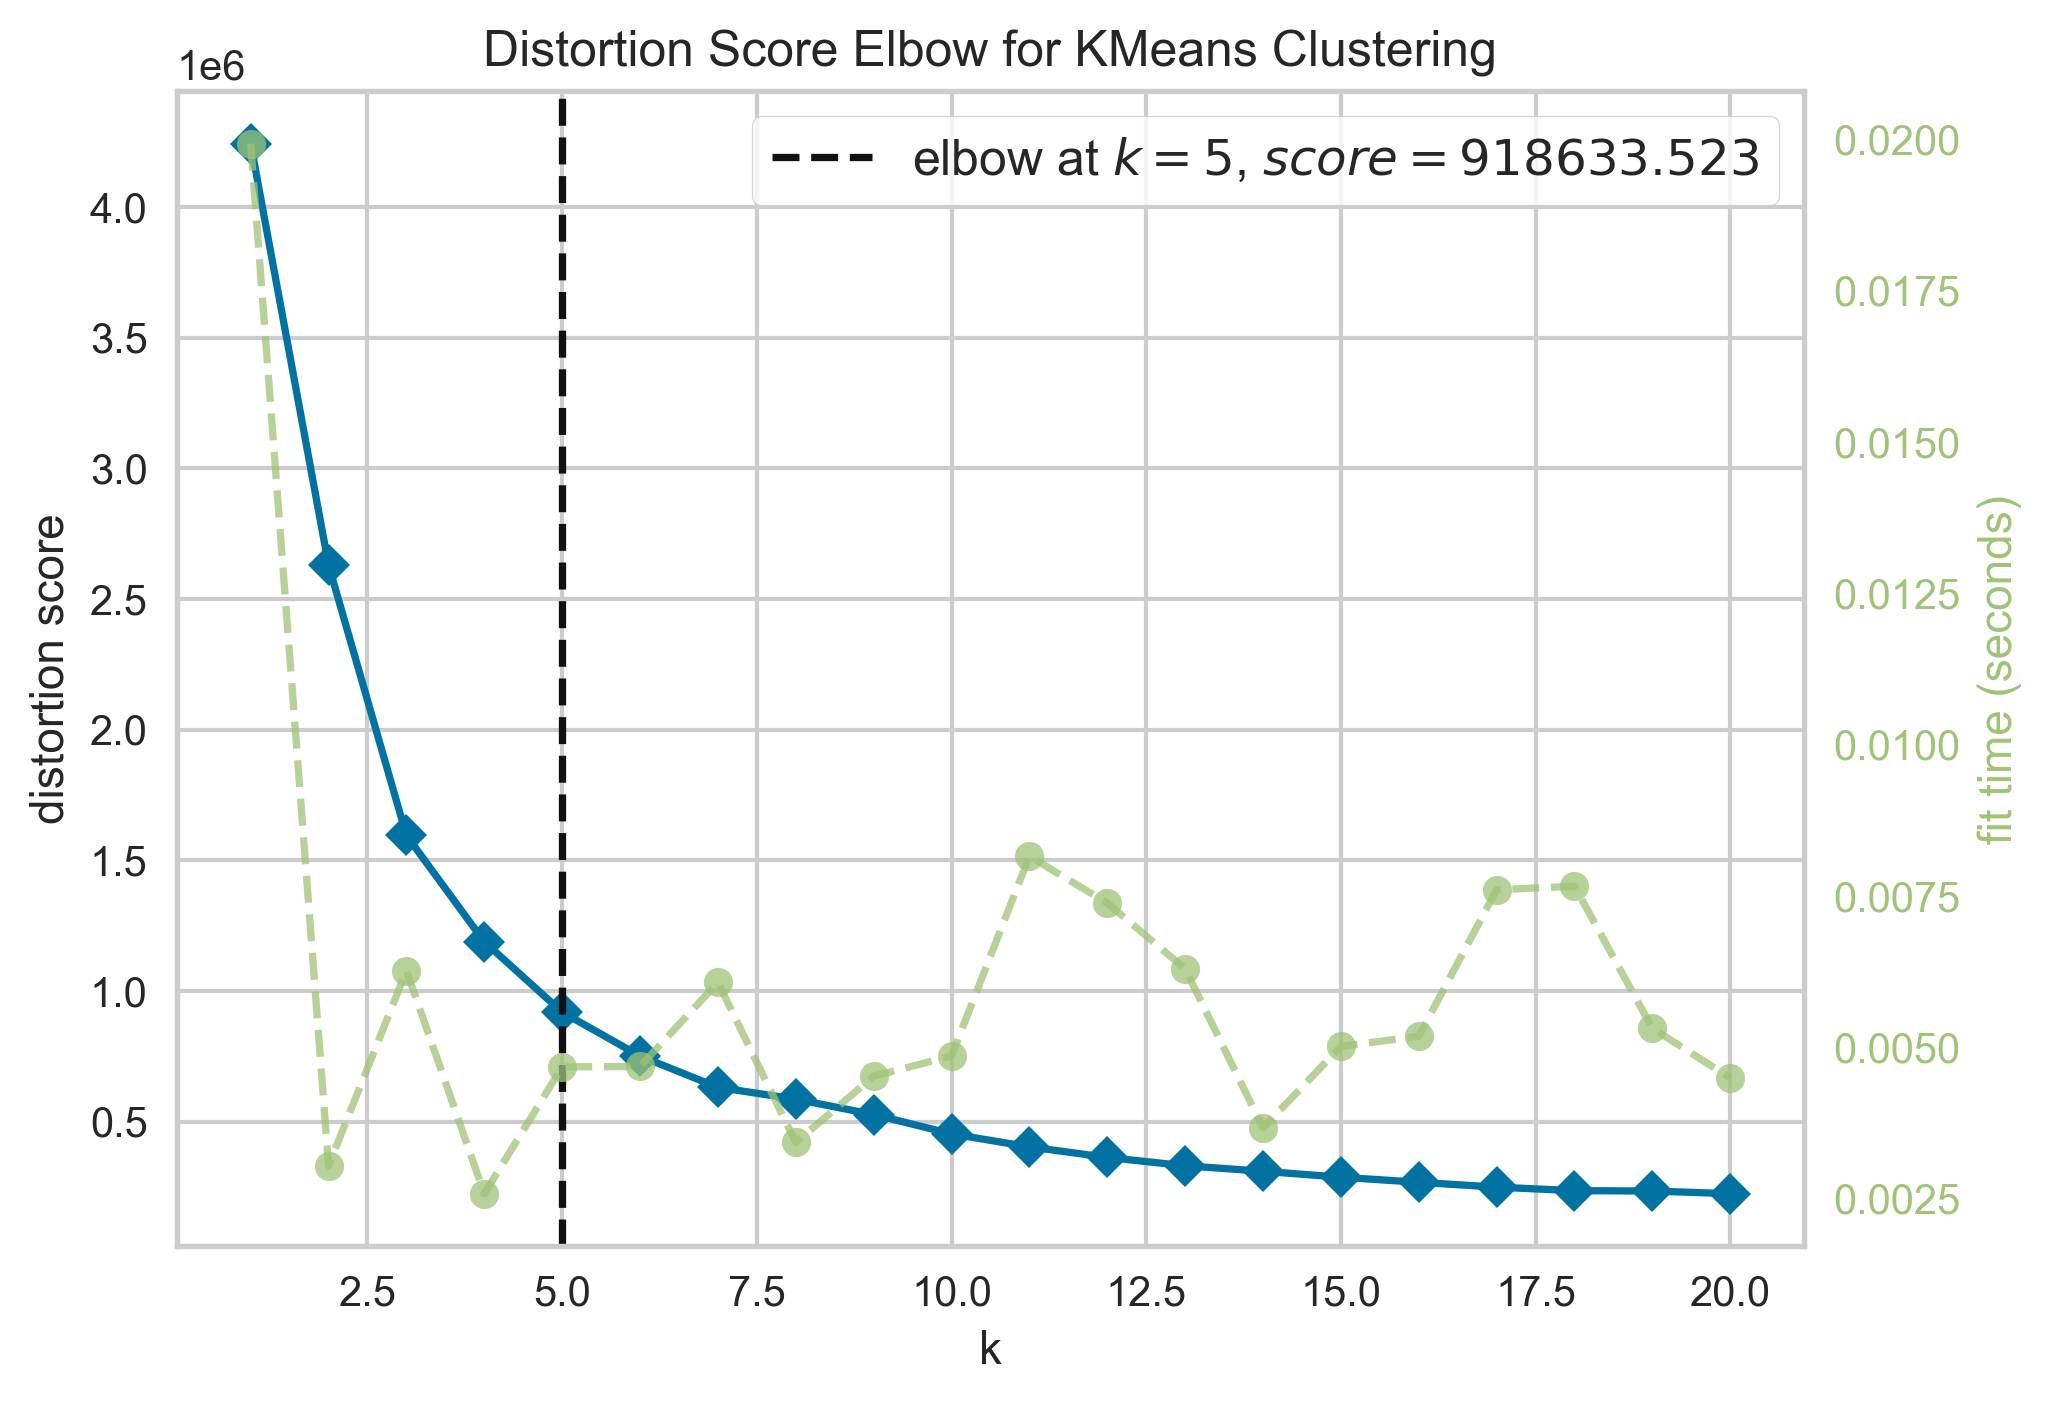

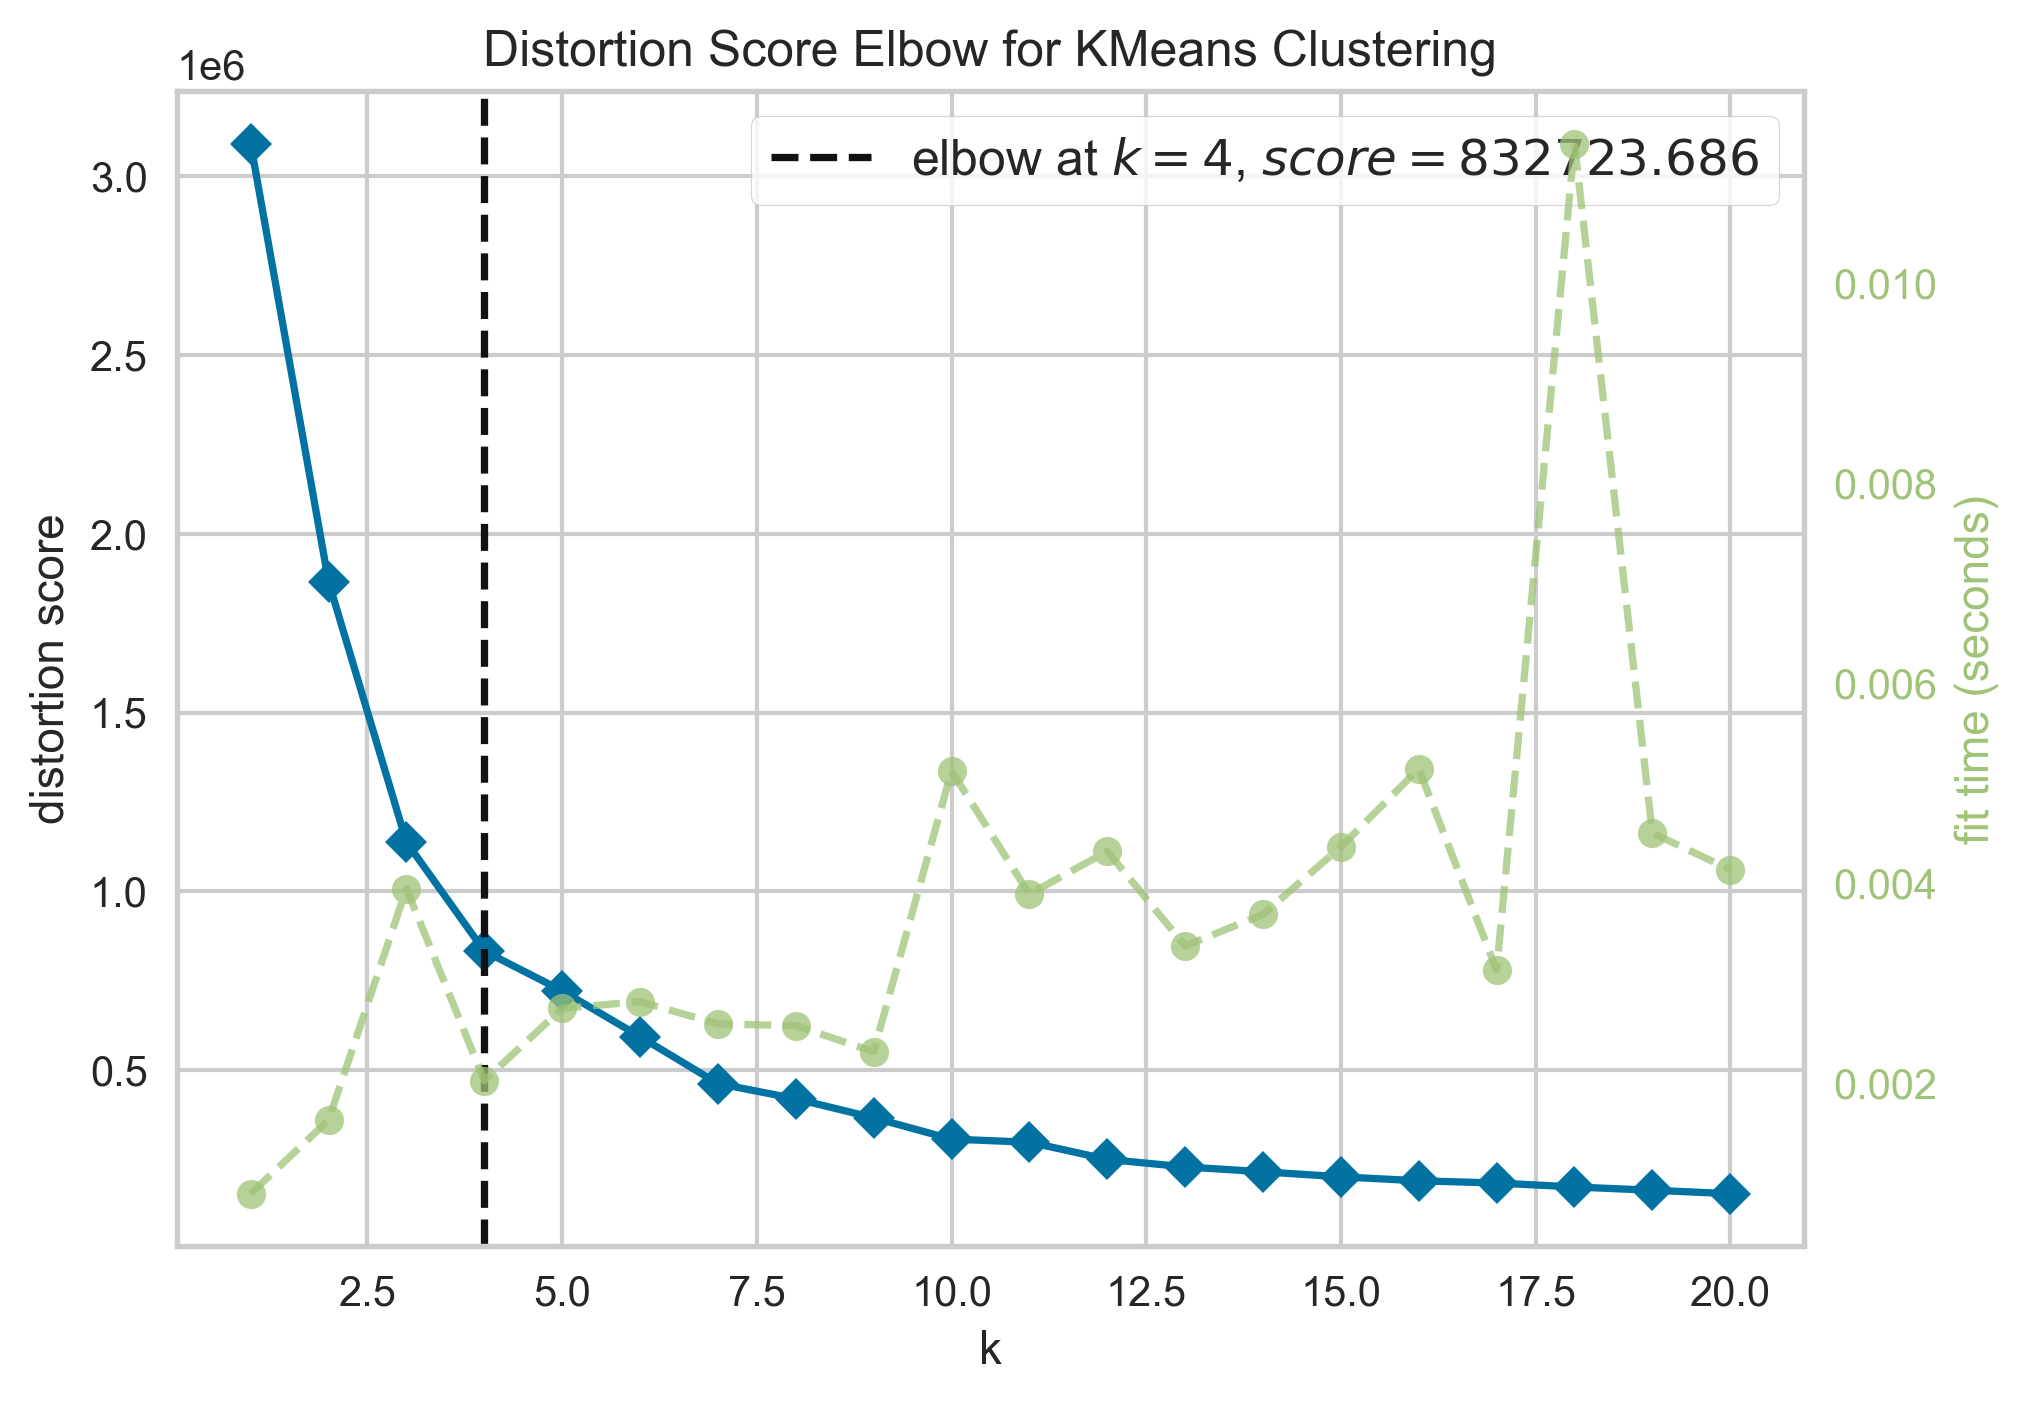

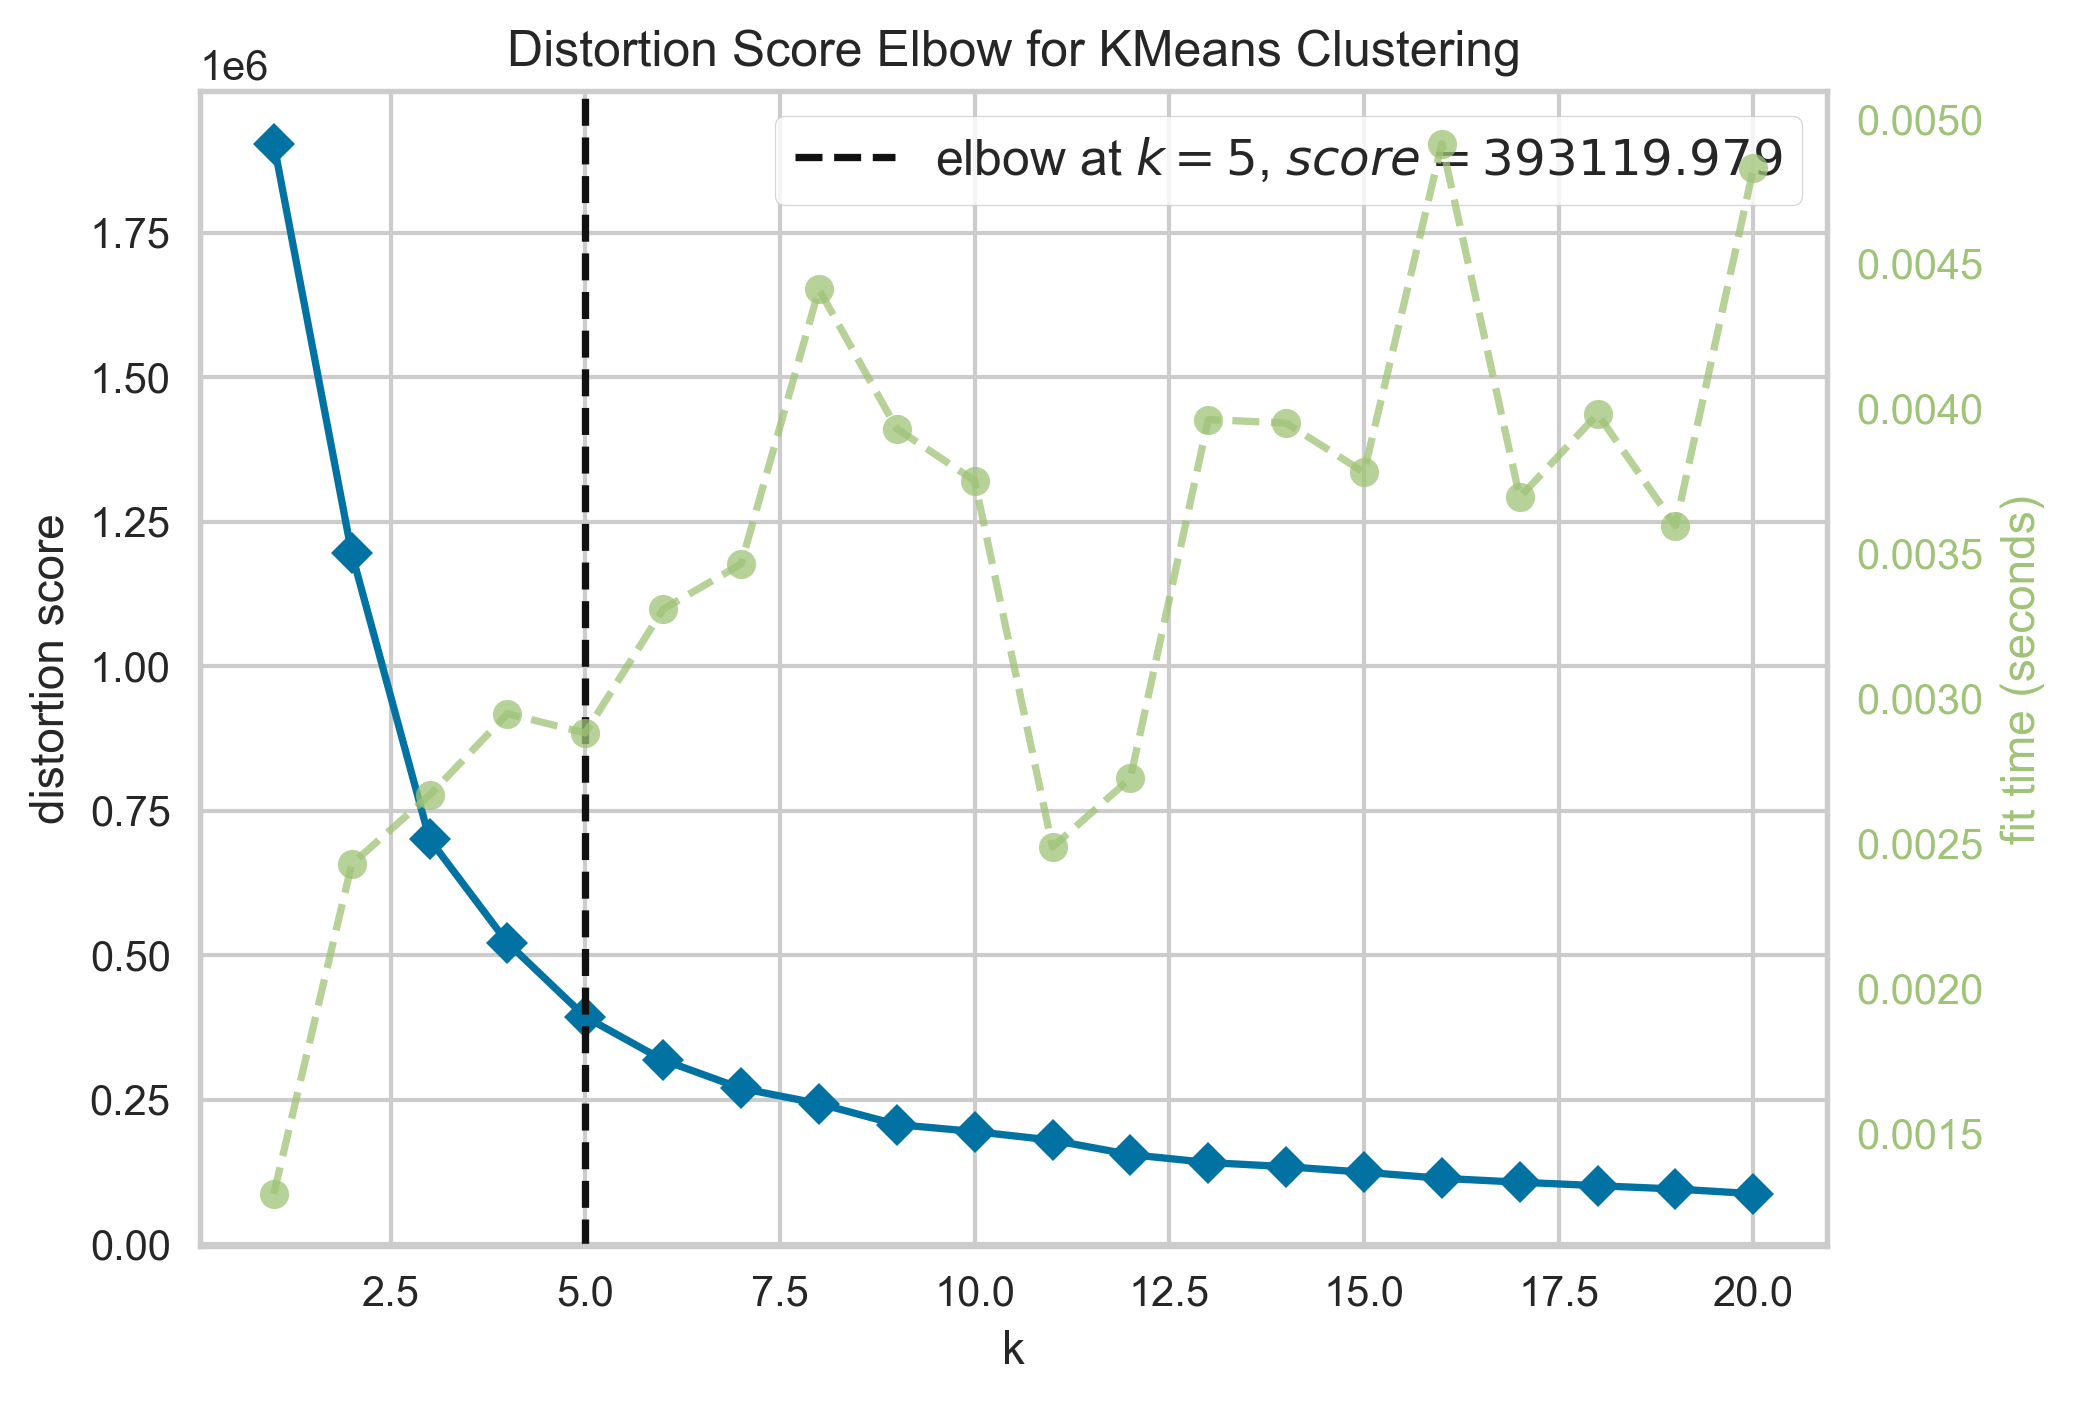

In [ ]:

out_dir = './example_step2/'

for file in os.listdir("example_step1/"):
    if file.endswith("tsne.csv"):
        print(file)

        X = pd.read_csv("example_step1/"+file, index_col=0)
        outfile = file.replace(".csv", "_label.csv")
        figname = file.replace(".csv", "")

        plt.figure(figsize=(7,5), dpi=300)
        model = KMeans(random_state=4)
        dd = KElbowVisualizer(model, k=(1, 21)) 
        dd.fit(X) 
        dd.poof(outpath=out_dir + figname + '.pdf')

        km = dd.elbow_value_

        mdl = pd.DataFrame.from_records(X, columns=["TSNE_1", "TSNE_2"])
        seed = 4  
        clf = KMeans(n_clusters=km, random_state=seed) 
        clf.fit(mdl) 

        print(clf.cluster_centers_) 
        mdl['label'] = clf.labels_ 
        c = mdl['label'].value_counts()
        mdl.index = X.index
        print(mdl.values) 

        mdl.to_csv("./" + out_dir + outfile)